In [3]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras import losses

from keras import datasets  # mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [4]:
# data 확인
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(X_train[0][:2])
print(y_train[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
5


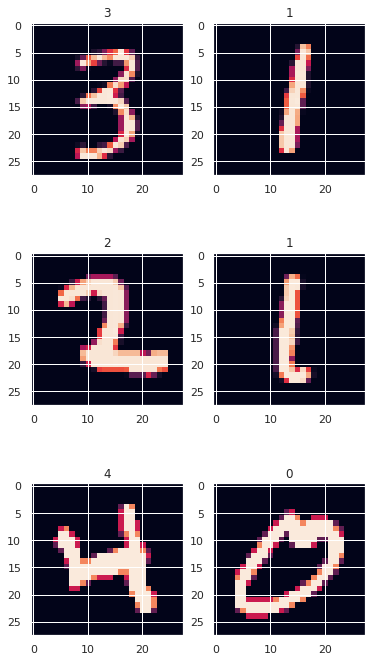

In [6]:
plt.figure(figsize=(6,12))

for i in range(6):
    n = np.random.randint(0, len(X_train))
    plt.subplot(320+1+i)
    plt.imshow(X_train[n])
    plt.title(y_train[n])


In [7]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

n = np.random.randint(0, 100)
print(y_train[n])
print(Y_train[n])

print(y_test[n])
print(Y_test[n])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
class ANN(Sequential):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.add(Dense(hidden_dim, input_dim=input_dim, activation="relu", name="input_Layer") )
        self.add(Dense(output_dim, activation="softmax", name="output_Layer"), )
        self.compile(loss=losses.categorical_crossentropy,
                     optimizer="adam", metrics=['acc'])

In [10]:
# input data 정의
input_dim = X_train.shape[1]
hidden_layer = 100
output_dim = Y_train.shape[1]

# 모델 생성
model = ANN(input_dim, hidden_layer, output_dim)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Layer (Dense)          (None, 100)               78500     
_________________________________________________________________
output_Layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.4103 - acc: 0.8848 - val_loss: 0.2270 - val_acc: 0.9385
Epoch 2/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1986 - acc: 0.9426 - val_loss: 0.1699 - val_acc: 0.9523
Epoch 3/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1457 - acc: 0.9576 - val_loss: 0.1432 - val_acc: 0.9606
Epoch 4/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.1150 - acc: 0.9670 - val_loss: 0.1286 - val_acc: 0.9630
Epoch 5/10
48000/48000 [==============================] - 2s 44us/step - loss: 0.0940 - acc: 0.9728 - val_loss: 0.1128 - val_acc: 0.9677
Epoch 6/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.0793 - acc: 0.9775 - val_loss: 0.1045 - val_acc: 0.9698
Epoch 7/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.0671 - acc: 0.9807 - val_loss: 0.0986 - val_acc

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=100)

print("Test Loss\t:\t{:2.4f}".format(loss))
print("Test Accuracy\t:\t{:2.4f}".format(accuracy))

10000/10000 [==============================] - 0s 15us/step
Test Loss	:	0.0784
Test Accuracy	:	0.9757


In [14]:
h = pd.DataFrame(history.history)
h = h.reset_index()

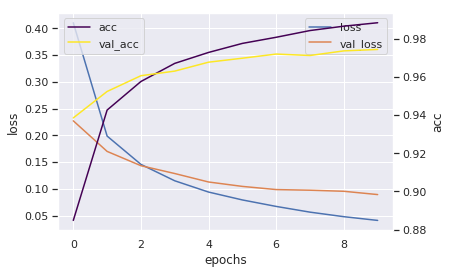

In [15]:
ax = h.plot(x="index", y=["loss", "val_loss"])
ax.set_ylabel("loss")
ax2 = ax.twinx()
ax2.set_ylabel("acc")
h.plot(x="index", y=["acc", "val_acc"], ax=ax2, colormap='viridis',)
ax.set_xlabel("epochs")
plt.grid(False)

plt.show()

In [16]:
yhat_test = model.predict(X_test, batch_size=32)

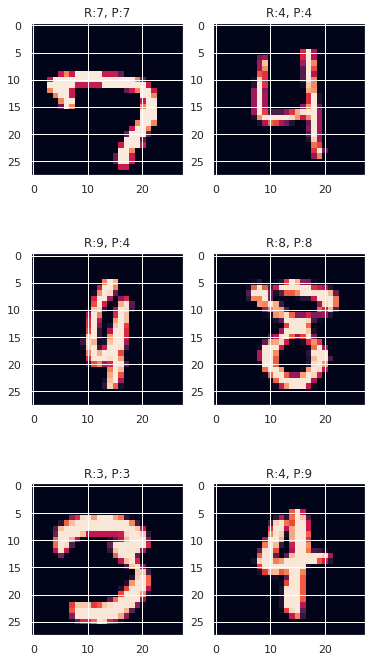

In [17]:
plt.figure(figsize=(6,12))

for i in range(6):
    n = np.random.randint(0, len(X_test))
    plt.subplot(320+1+i)
    plt.imshow(X_test[n].reshape(28, 28))
    plt.title("R:{}, P:{}".format(y_test[n], np.argmax(yhat_test[n])) )



In [18]:
## 추가 Deep NN

In [19]:
class DNN(Sequential):
    def __init__(self, input_dim, hidden_dim, output_dim, depth=5):
        super().__init__()
        self.add(Dense(hidden_dim, input_dim=input_dim, activation="relu", name="input_Layer") )
        for x in range(depth):
            self.add(Dense(hidden_dim, activation="relu", name="hidden_layer_{:02}".format(x)))
        self.add(Dense(output_dim, activation="softmax", name="output_Layer"), )
        self.compile(loss=losses.categorical_crossentropy,
                     optimizer="adam", metrics=['acc'])

In [20]:
# input data 정의
input_dim = X_train.shape[1]
hidden_layer = 100
output_dim = Y_train.shape[1]

# 모델 생성
dnn = DNN(input_dim, hidden_layer, output_dim, depth=20)

In [21]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Layer (Dense)          (None, 100)               78500     
_________________________________________________________________
hidden_layer_00 (Dense)      (None, 100)               10100     
_________________________________________________________________
hidden_layer_01 (Dense)      (None, 100)               10100     
_________________________________________________________________
hidden_layer_02 (Dense)      (None, 100)               10100     
_________________________________________________________________
hidden_layer_03 (Dense)      (None, 100)               10100     
_________________________________________________________________
hidden_layer_04 (Dense)      (None, 100)               10100     
_________________________________________________________________
hidden_layer_05 (Dense)      (None, 100)               10100     
__________

In [22]:
history = dnn.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.8958 - acc: 0.6795 - val_loss: 0.3755 - val_acc: 0.8912
Epoch 2/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.3404 - acc: 0.9081 - val_loss: 0.2998 - val_acc: 0.9233
Epoch 3/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.2436 - acc: 0.9385 - val_loss: 0.2003 - val_acc: 0.9485
Epoch 4/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.1892 - acc: 0.9525 - val_loss: 0.2097 - val_acc: 0.9456
Epoch 5/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.2534 - acc: 0.9364 - val_loss: 0.2620 - val_acc: 0.9242
Epoch 6/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.1524 - acc: 0.9618 - val_loss: 0.1893 - val_acc: 0.9568
Epoch 7/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.1376 - acc: 0.9653 - val_loss: 0.1730 - 

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=100)

print("Test Loss\t:\t{:2.4f}".format(loss))
print("Test Accuracy\t:\t{:2.4f}".format(accuracy))

10000/10000 [==============================] - 0s 16us/step
Test Loss	:	0.0784
Test Accuracy	:	0.9757


In [24]:
h = pd.DataFrame(history.history)
h = h.reset_index()

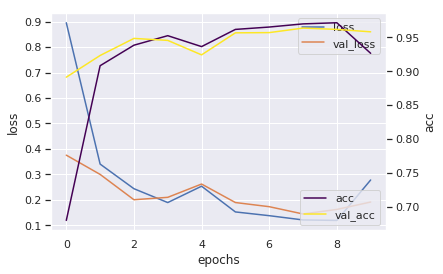

In [25]:
ax = h.plot(x="index", y=["loss", "val_loss"])
ax.set_ylabel("loss")
ax2 = ax.twinx()
ax2.set_ylabel("acc")
h.plot(x="index", y=["acc", "val_acc"], ax=ax2, colormap='viridis',)
ax.set_xlabel("epochs")
plt.grid(False)

plt.show()

In [26]:
yhat_test = model.predict(X_test, batch_size=32)

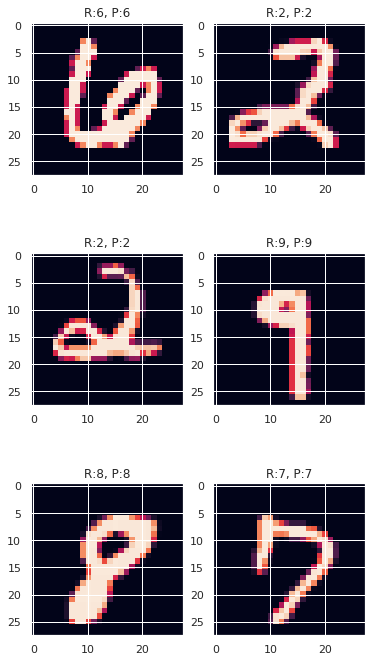

In [27]:
plt.figure(figsize=(6,12))

for i in range(6):
    n = np.random.randint(0, len(X_test))
    plt.subplot(320+1+i)
    plt.imshow(X_test[n].reshape(28, 28))
    plt.title("R:{}, P:{}".format(y_test[n], np.argmax(yhat_test[n])) )


